In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Palmer Penguins Dataset Case Study with Seaborn

This notebook demonstrates how to use Seaborn for exploratory data analysis using the Palmer Penguins dataset. We'll explore various aspects of the dataset and create visualizations to gain insights into the different penguin species and their characteristics.

## Dataset Description

The Palmer Penguins dataset contains data for 344 penguins of three different species (Adelie, Chinstrap, and Gentoo) observed on three islands in the Palmer Archipelago, Antarctica. The dataset includes measurements such as bill length, bill depth, flipper length, body mass, as well as the penguin's species, island, and sex.

In [2]:
# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Display the first few rows of the dataset to understand its structure
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Get basic information about the dataset
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Get summary statistics of the dataset
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data Preparation

Let's check for missing values and handle them appropriately.

Missing values in each column: bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


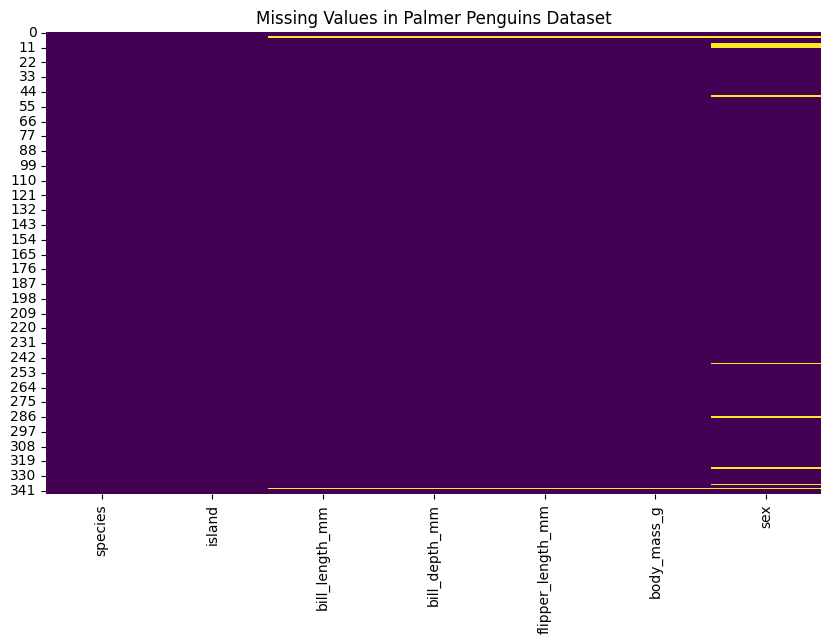

In [5]:
# Check for missing values
missing_values = penguins.isnull().sum()
print("Missing values in each column:", missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(penguins.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Palmer Penguins Dataset")
plt.show()

In [6]:
# Handle missing values
# For this analysis, we'll drop rows with missing values
penguins_clean = penguins.dropna()

# Check if missing values are handled
print("Original dataset shape:", penguins.shape)
print("Clean dataset shape:", penguins_clean.shape)
print("Number of rows removed:", penguins.shape[0] - penguins_clean.shape[0])

# Use the clean dataset for the rest of the analysis
penguins = penguins_clean

Original dataset shape: (344, 7)
Clean dataset shape: (333, 7)
Number of rows removed: 11


## Exploratory Data Analysis

Let's explore the dataset to understand the different penguin species and their characteristics.

### Species Distribution

First, let's look at the distribution of penguin species in the dataset.

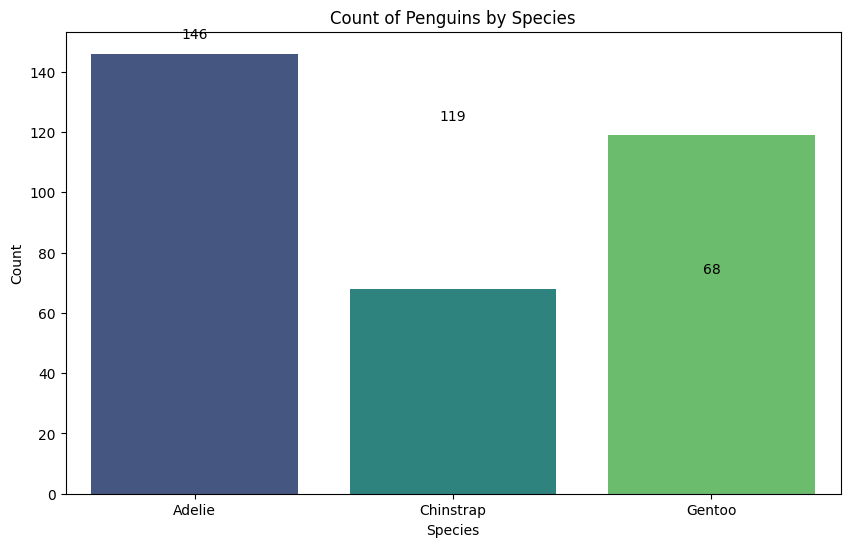

Percentage of each species:
species
Adelie       43.843844
Gentoo       35.735736
Chinstrap    20.420420
Name: proportion, dtype: float64


In [27]:
# Assuming penguins dataset is loaded
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=penguins, hue='species', palette='viridis', legend=False)
plt.title("Count of Penguins by Species")
plt.xlabel("Species")
plt.ylabel("Count")

# Add count labels on top of bars
species_counts = penguins['species'].value_counts()
for i, count in enumerate(species_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

# Calculate percentage of each species
species_percentage = penguins['species'].value_counts(normalize=True) * 100
print("Percentage of each species:")
print(species_percentage)

### Island Distribution

Let's examine the distribution of penguins across the three islands.

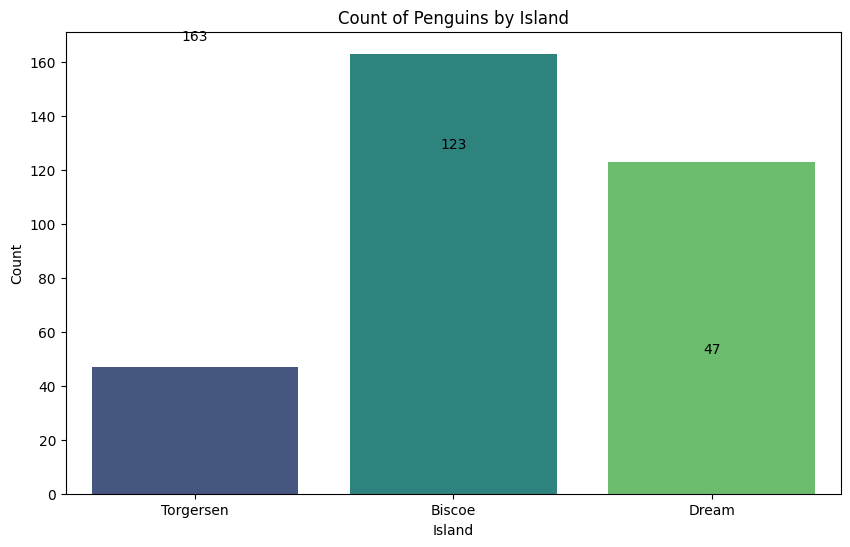

Percentage of penguins on each island: island
Biscoe       48.948949
Dream        36.936937
Torgersen    14.114114
Name: proportion, dtype: float64


In [28]:
# Count of penguins on each island
plt.figure(figsize=(10, 6))
sns.countplot(x='island', data=penguins, hue='island', palette='viridis', legend=False)
plt.title("Count of Penguins by Island")
plt.xlabel("Island")
plt.ylabel("Count")

# Add count labels on top of bars
for i, count in enumerate(penguins['island'].value_counts()):
    plt.text(i, count + 5, str(count), ha='center')
    
plt.show()

# Calculate percentage of penguins on each island
island_percentage = penguins['island'].value_counts(normalize=True) * 100
print("Percentage of penguins on each island:", island_percentage)

### Species Distribution by Island

Let's examine how the different penguin species are distributed across the three islands.

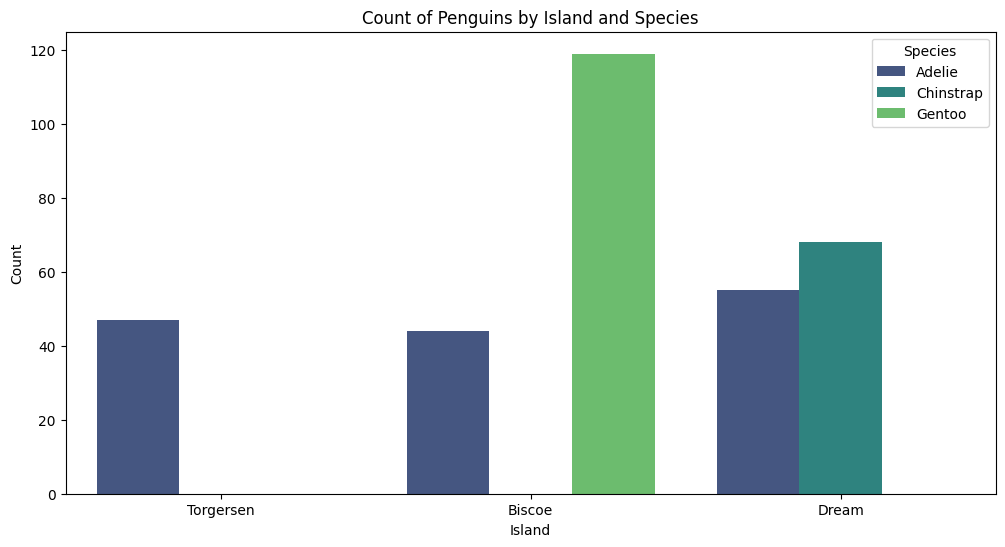

Cross-tabulation of species and island: island     Biscoe  Dream  Torgersen
species                            
Adelie         44     55         47
Chinstrap       0     68          0
Gentoo        119      0          0


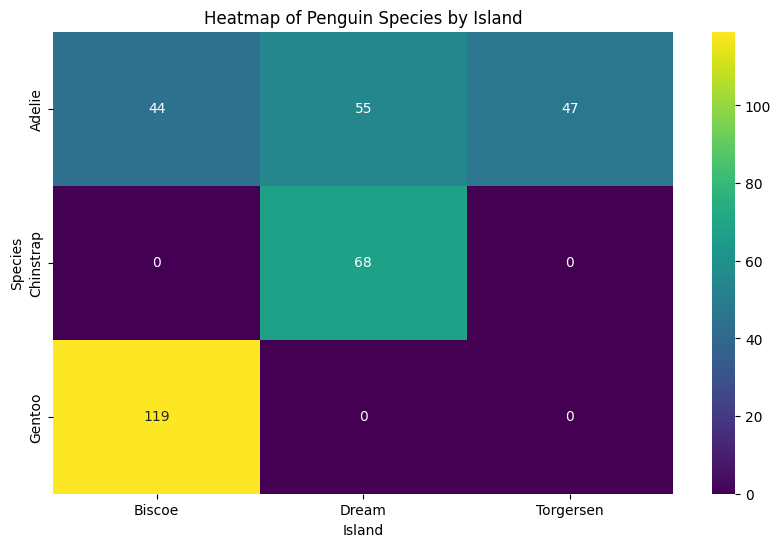

In [9]:
# Count of each species on each island
plt.figure(figsize=(12, 6))
sns.countplot(x='island', hue='species', data=penguins, palette='viridis')
plt.title("Count of Penguins by Island and Species")
plt.xlabel("Island")
plt.ylabel("Count")
plt.legend(title="Species")
plt.show()

# Create a cross-tabulation of species and island
species_island_crosstab = pd.crosstab(penguins['species'], penguins['island'])
print("Cross-tabulation of species and island:", species_island_crosstab)

# Visualize the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(species_island_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title("Heatmap of Penguin Species by Island")
plt.xlabel("Island")
plt.ylabel("Species")
plt.show()

### Sex Distribution

Let's examine the distribution of male and female penguins in the dataset.

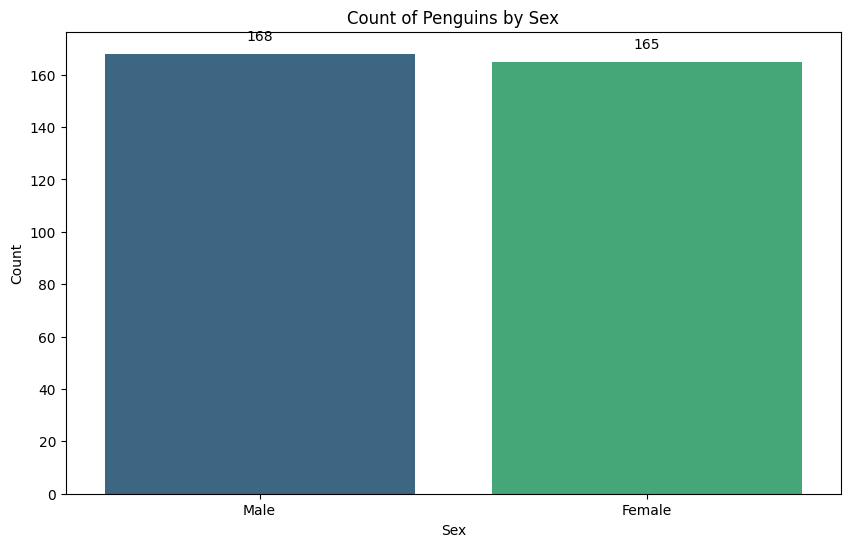

Percentage of each sex: sex
Male      50.45045
Female    49.54955
Name: proportion, dtype: float64


In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=penguins, hue='sex', palette='viridis', legend=False)
plt.title("Count of Penguins by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

# Add count labels on top of bars
counts = penguins['sex'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

# Calculate percentage of each sex
sex_percentage = penguins['sex'].value_counts(normalize=True) * 100
print("Percentage of each sex:", sex_percentage)


### Sex Distribution by Species

Let's examine how the sex distribution varies across the different penguin species.

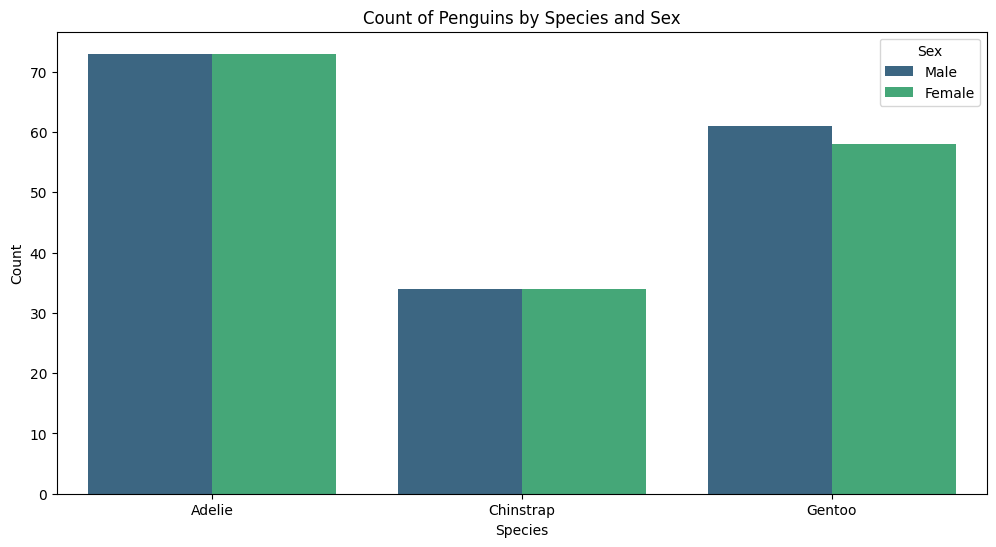

Cross-tabulation of species and sex: sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


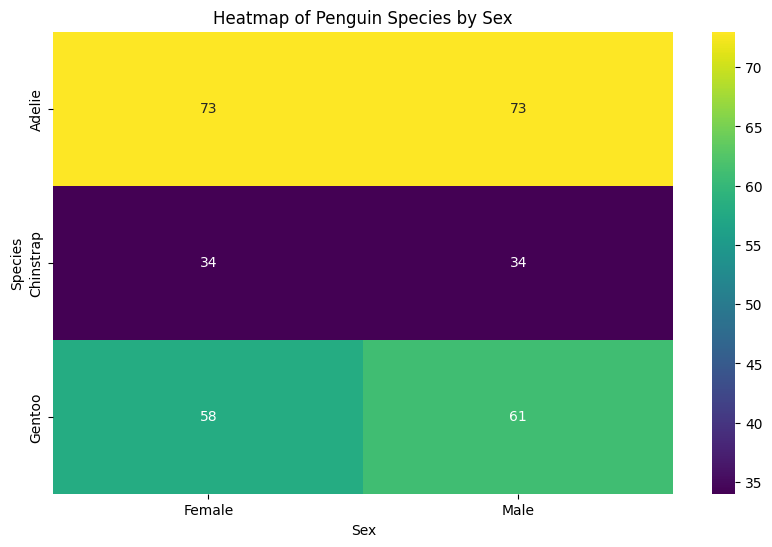

In [11]:
# Count of each sex by species
plt.figure(figsize=(12, 6))
sns.countplot(x='species', hue='sex', data=penguins, palette='viridis')
plt.title("Count of Penguins by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()

# Create a cross-tabulation of species and sex
species_sex_crosstab = pd.crosstab(penguins['species'], penguins['sex'])
print("Cross-tabulation of species and sex:", species_sex_crosstab)

# Visualize the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(species_sex_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title("Heatmap of Penguin Species by Sex")
plt.xlabel("Sex")
plt.ylabel("Species")
plt.show()

## Body Measurements Analysis

Let's analyze the body measurements of the penguins, including bill length, bill depth, flipper length, and body mass.

### Distribution of Body Measurements

Let's examine the distribution of each body measurement.

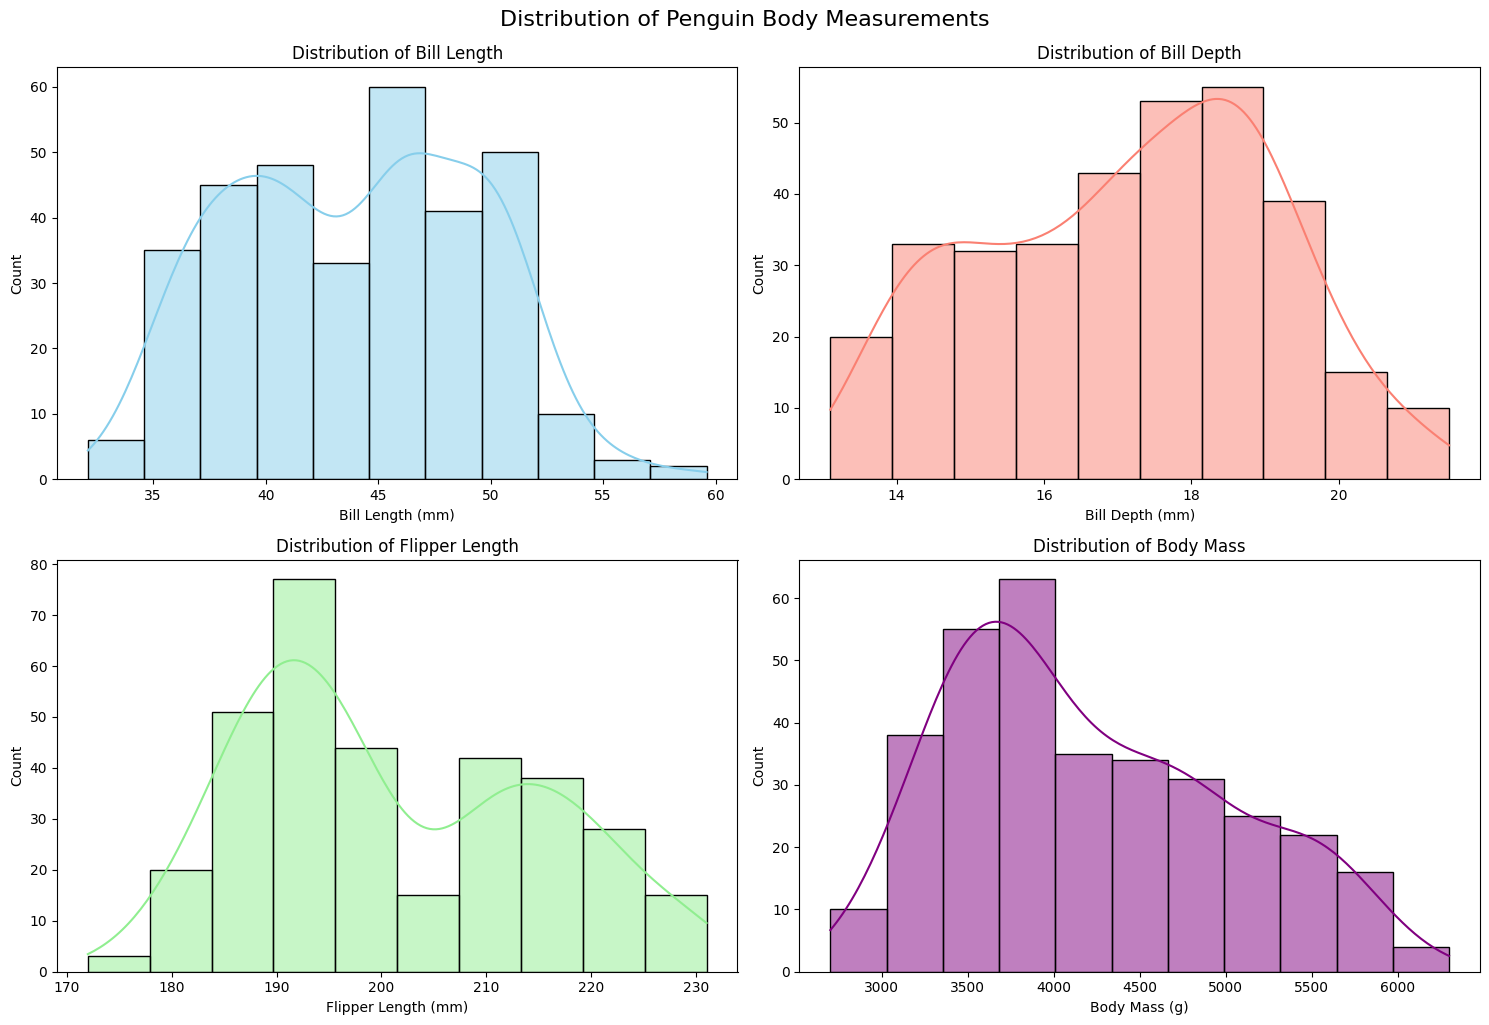

In [12]:
# Create histograms for each measurement
plt.figure(figsize=(15, 10))

# Bill length
plt.subplot(2, 2, 1)
sns.histplot(data=penguins, x='bill_length_mm', kde=True, color='skyblue')
plt.title("Distribution of Bill Length")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Count")

# Bill depth
plt.subplot(2, 2, 2)
sns.histplot(data=penguins, x='bill_depth_mm', kde=True, color='salmon')
plt.title("Distribution of Bill Depth")
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Count")

# Flipper length
plt.subplot(2, 2, 3)
sns.histplot(data=penguins, x='flipper_length_mm', kde=True, color='lightgreen')
plt.title("Distribution of Flipper Length")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")

# Body mass
plt.subplot(2, 2, 4)
sns.histplot(data=penguins, x='body_mass_g', kde=True, color='purple')
plt.title("Distribution of Body Mass")
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")

plt.tight_layout()
plt.suptitle("Distribution of Penguin Body Measurements", y=1.02, fontsize=16)
plt.show()

### Body Measurements by Species

Let's examine how the body measurements vary across the different penguin species.

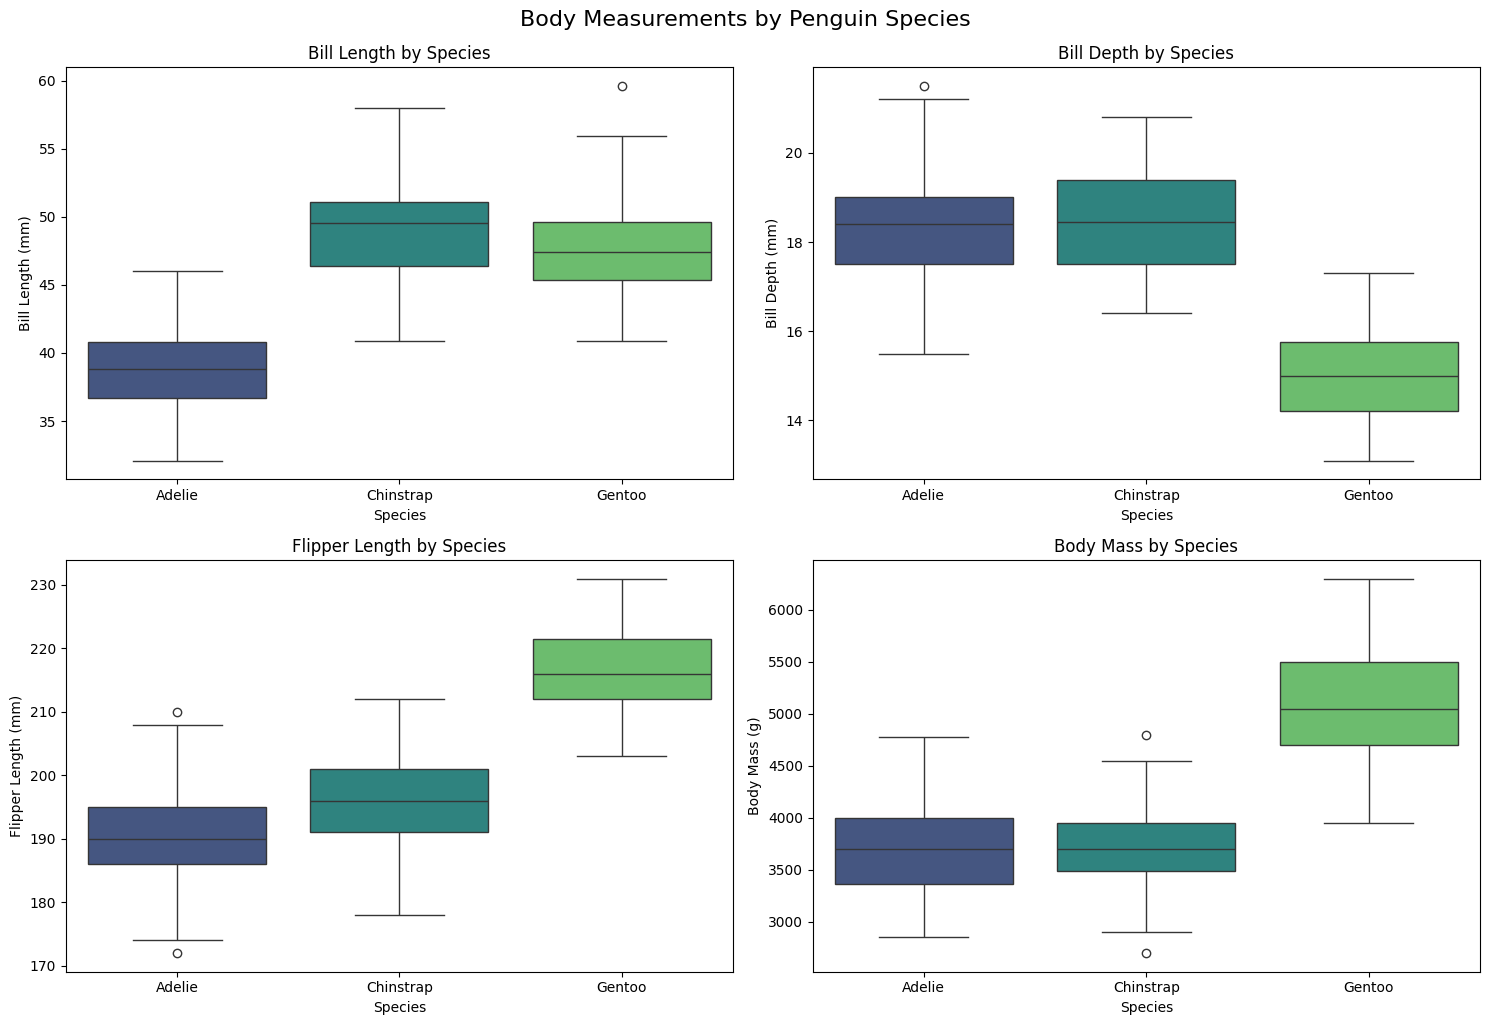

In [30]:
plt.figure(figsize=(15, 10))

# Bill length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Bill Length by Species")
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")

# Bill depth
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Bill Depth by Species")
plt.xlabel("Species")
plt.ylabel("Bill Depth (mm)")

# Flipper length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='flipper_length_mm', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")

# Body mass
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Body Mass by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")

plt.tight_layout()
plt.suptitle("Body Measurements by Penguin Species", y=1.02, fontsize=16)
plt.show()


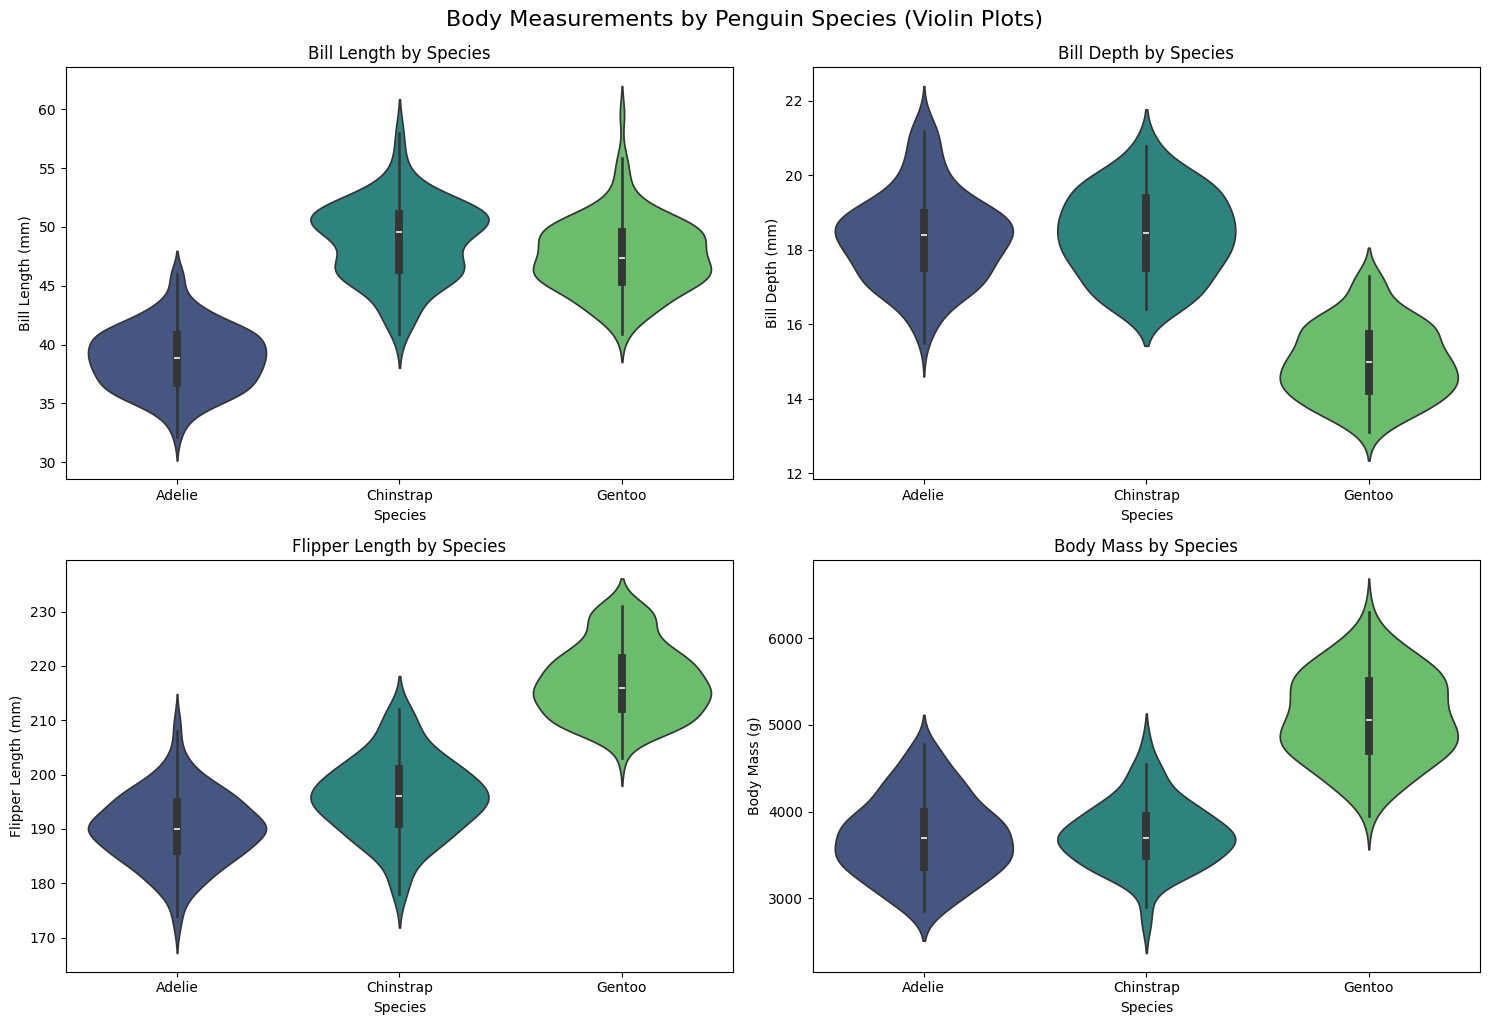

In [31]:
plt.figure(figsize=(15, 10))

# Bill length
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='bill_length_mm', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Bill Length by Species")
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")

# Bill depth
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='bill_depth_mm', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Bill Depth by Species")
plt.xlabel("Species")
plt.ylabel("Bill Depth (mm)")

# Flipper length
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='flipper_length_mm', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")

# Body mass
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='body_mass_g', data=penguins, palette='viridis', hue='species', legend=False)
plt.title("Body Mass by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")

plt.tight_layout()
plt.suptitle("Body Measurements by Penguin Species (Violin Plots)", y=1.02, fontsize=16)
plt.show()


### Body Measurements by Sex

Let's examine how the body measurements vary between male and female penguins.

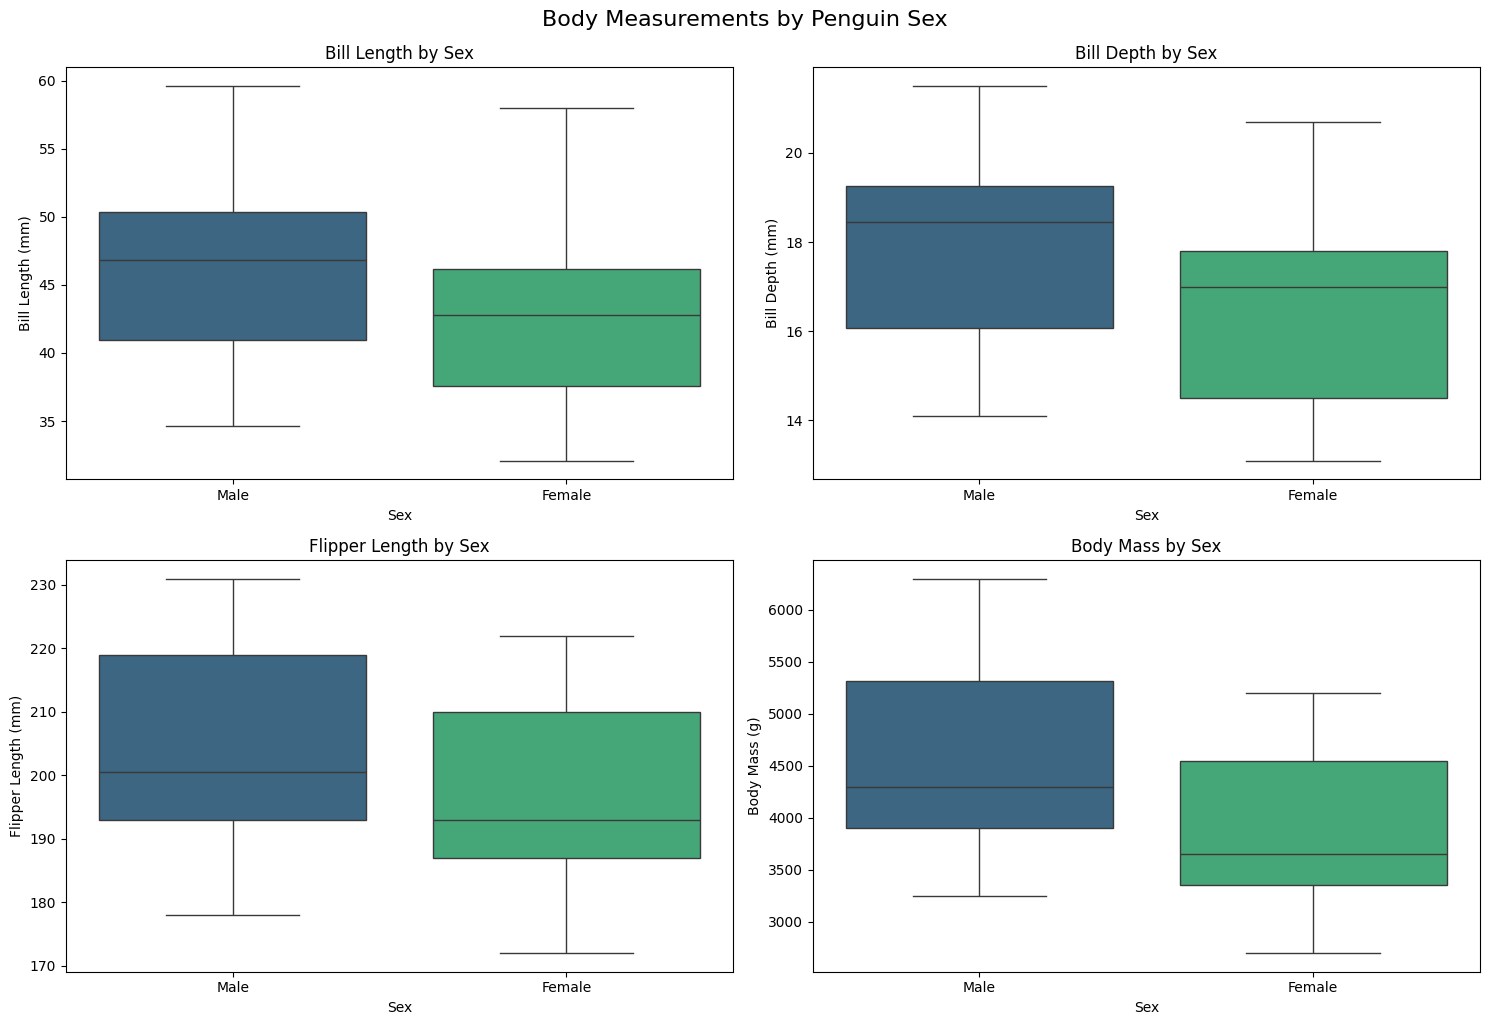

In [32]:
plt.figure(figsize=(15, 10))

# Bill length
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='bill_length_mm', data=penguins, palette='viridis', hue='sex', legend=False)
plt.title("Bill Length by Sex")
plt.xlabel("Sex")
plt.ylabel("Bill Length (mm)")

# Bill depth
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='bill_depth_mm', data=penguins, palette='viridis', hue='sex', legend=False)
plt.title("Bill Depth by Sex")
plt.xlabel("Sex")
plt.ylabel("Bill Depth (mm)")

# Flipper length
plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='flipper_length_mm', data=penguins, palette='viridis', hue='sex', legend=False)
plt.title("Flipper Length by Sex")
plt.xlabel("Sex")
plt.ylabel("Flipper Length (mm)")

# Body mass
plt.subplot(2, 2, 4)
sns.boxplot(x='sex', y='body_mass_g', data=penguins, palette='viridis', hue='sex', legend=False)
plt.title("Body Mass by Sex")
plt.xlabel("Sex")
plt.ylabel("Body Mass (g)")

plt.tight_layout()
plt.suptitle("Body Measurements by Penguin Sex", y=1.02, fontsize=16)
plt.show()


### Body Measurements by Species and Sex

Let's examine how the body measurements vary across different combinations of species and sex.

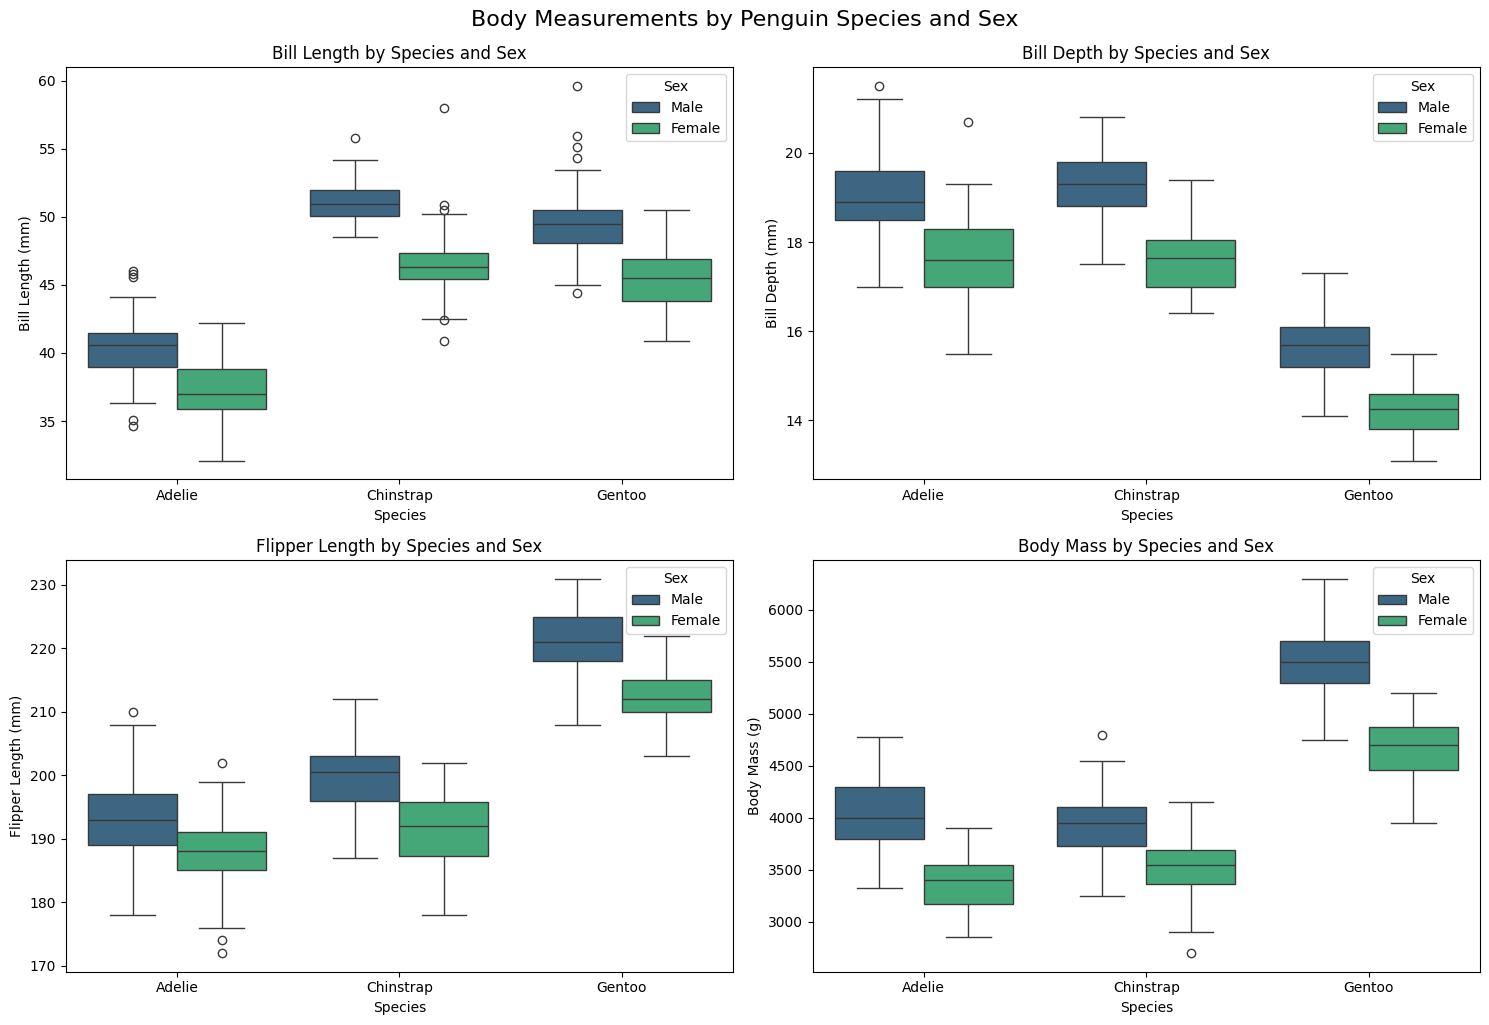

In [16]:
# Create box plots for each measurement by species and sex
plt.figure(figsize=(15, 10))

# Bill length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', hue='sex', data=penguins, palette='viridis')
plt.title("Bill Length by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")
plt.legend(title="Sex")

# Bill depth
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', hue='sex', data=penguins, palette='viridis')
plt.title("Bill Depth by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Bill Depth (mm)")
plt.legend(title="Sex")

# Flipper length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=penguins, palette='viridis')
plt.title("Flipper Length by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.legend(title="Sex")

# Body mass
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=penguins, palette='viridis')
plt.title("Body Mass by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.legend(title="Sex")

plt.tight_layout()
plt.suptitle("Body Measurements by Penguin Species and Sex", y=1.02, fontsize=16)
plt.show()

## Relationships Between Body Measurements

Let's explore the relationships between the different body measurements.

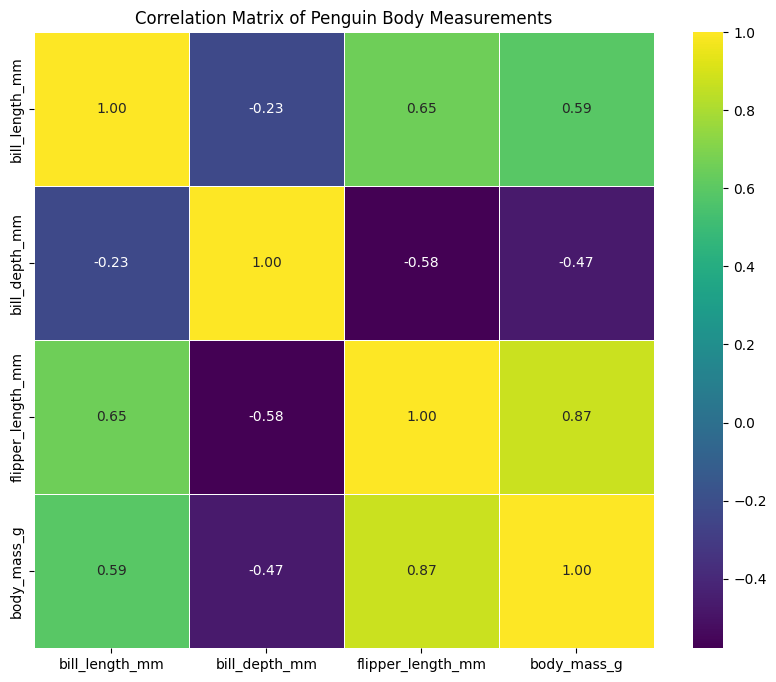

In [17]:
# Calculate correlation matrix
corr = penguins.select_dtypes(include=[np.number]).corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix of Penguin Body Measurements")
plt.show()

<Figure size 1500x1200 with 0 Axes>

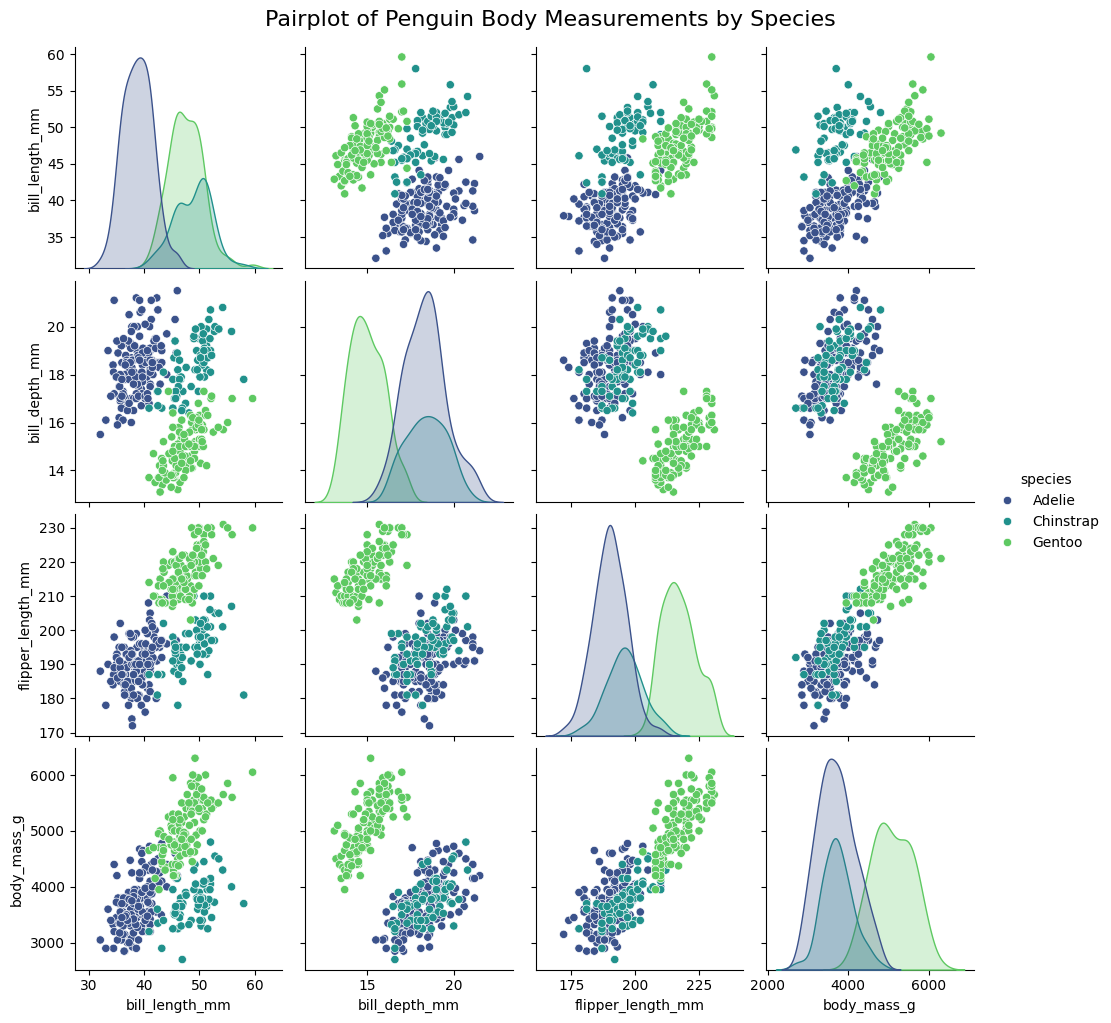

In [18]:
# Create a pairplot to visualize relationships between measurements
plt.figure(figsize=(15, 12))
sns.pairplot(penguins, hue='species', palette='viridis')
plt.suptitle("Pairplot of Penguin Body Measurements by Species", y=1.02, fontsize=16)
plt.show()

### Bill Dimensions Analysis

Let's take a closer look at the relationship between bill length and bill depth, which appears to be a good way to distinguish between the penguin species.

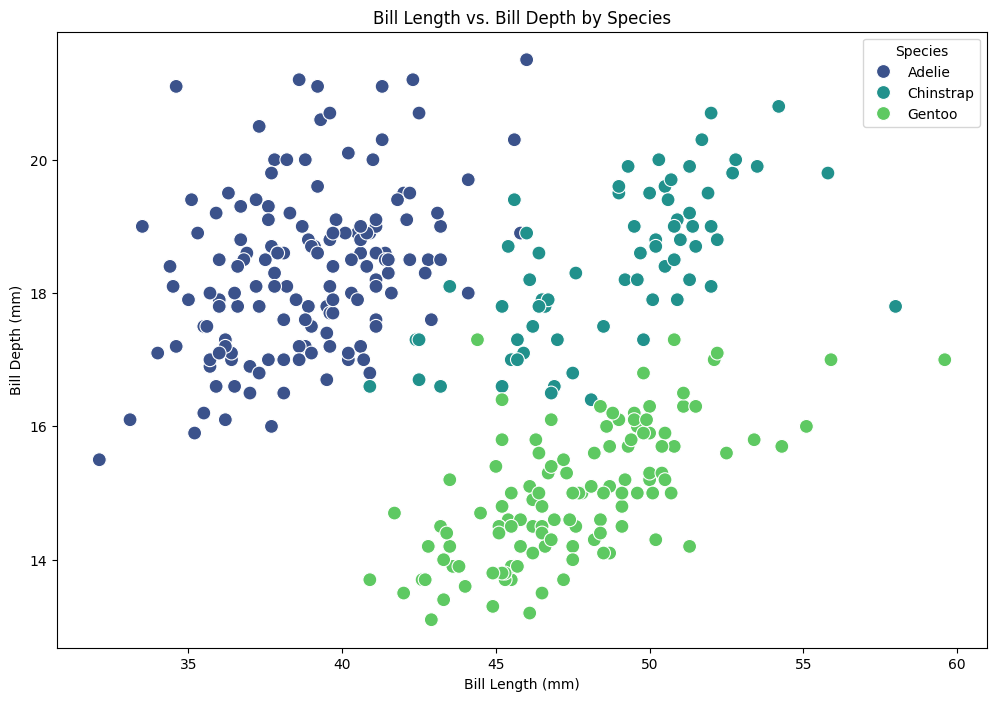

In [19]:
# Create a scatter plot of bill length vs. bill depth by species
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins, palette='viridis', s=100)
plt.title("Bill Length vs. Bill Depth by Species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend(title="Species")
plt.show()

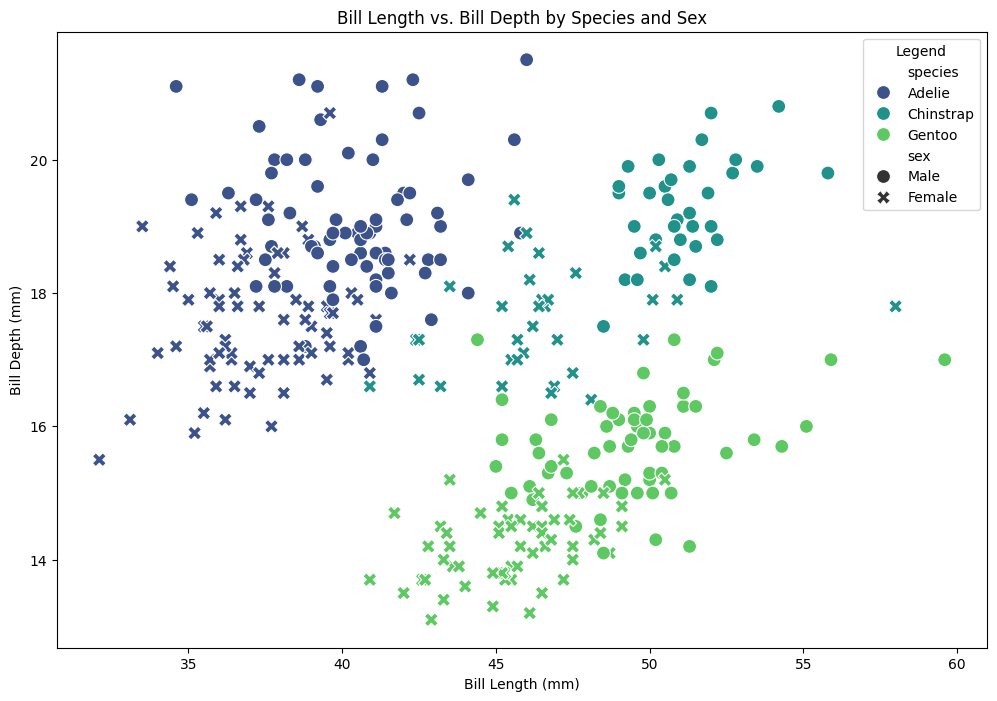

In [20]:
# Create a scatter plot of bill length vs. bill depth by species and sex
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', data=penguins, palette='viridis', s=100)
plt.title("Bill Length vs. Bill Depth by Species and Sex")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend(title="Legend")
plt.show()

### Body Mass and Flipper Length Analysis

Let's examine the relationship between body mass and flipper length.

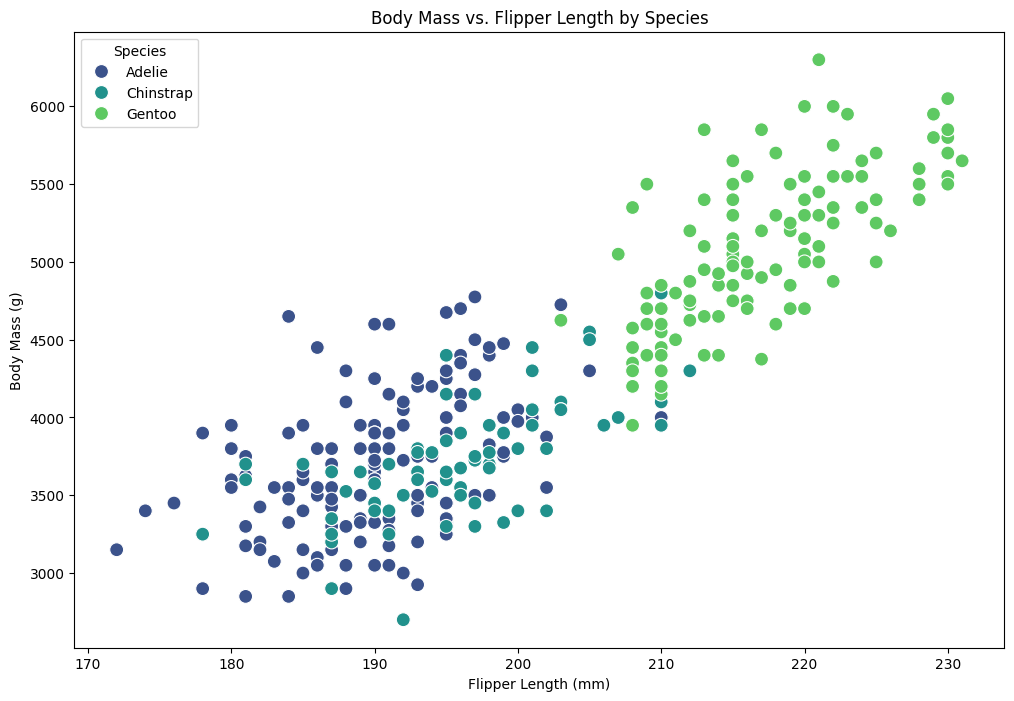

In [21]:
# Create a scatter plot of body mass vs. flipper length by species
plt.figure(figsize=(12, 8))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins, palette='viridis', s=100)
plt.title("Body Mass vs. Flipper Length by Species")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.show()

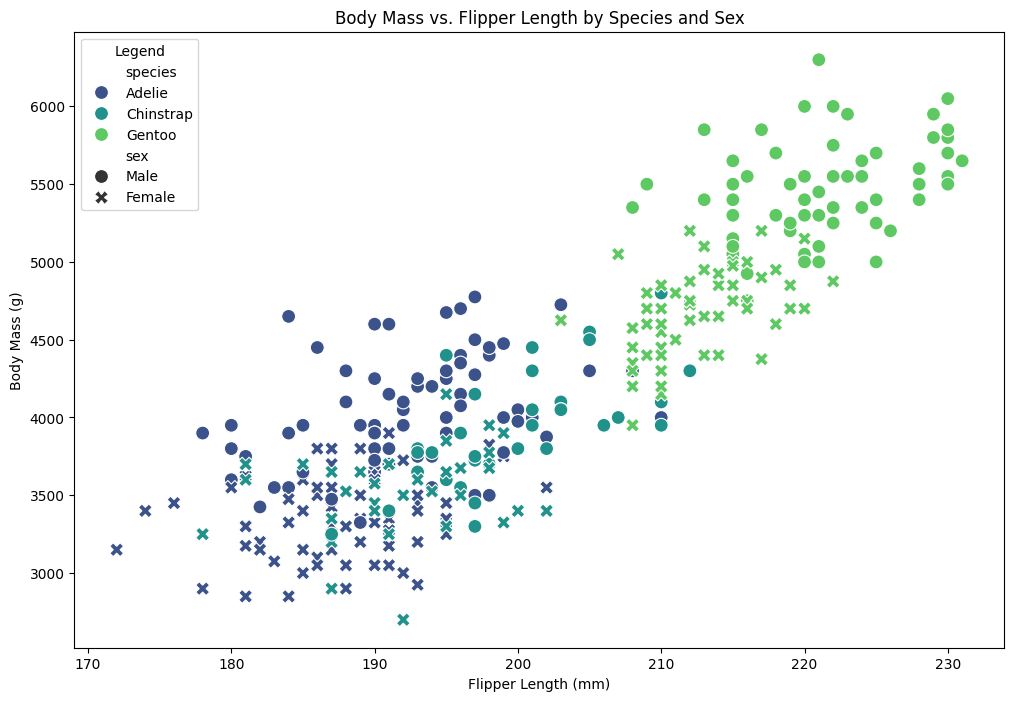

In [22]:
# Create a scatter plot of body mass vs. flipper length by species and sex
plt.figure(figsize=(12, 8))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', style='sex', data=penguins, palette='viridis', s=100)
plt.title("Body Mass vs. Flipper Length by Species and Sex")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Legend")
plt.show()

<Figure size 1200x800 with 0 Axes>

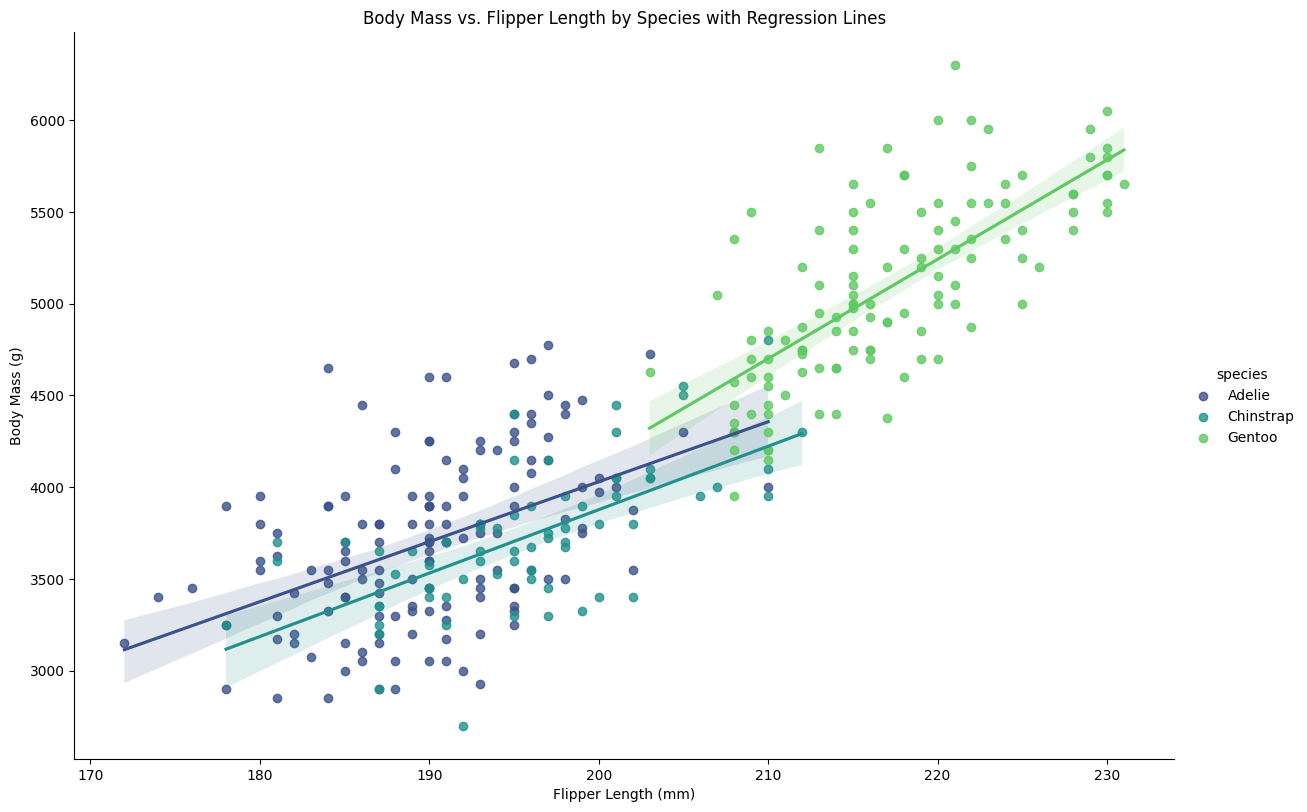

In [23]:
# Create a regression plot of body mass vs. flipper length by species
plt.figure(figsize=(12, 8))
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins, palette='viridis', height=8, aspect=1.5)
plt.title("Body Mass vs. Flipper Length by Species with Regression Lines")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

## Faceted Analysis

Let's use Seaborn's faceting capabilities to create multi-panel plots that show relationships conditioned on different variables.

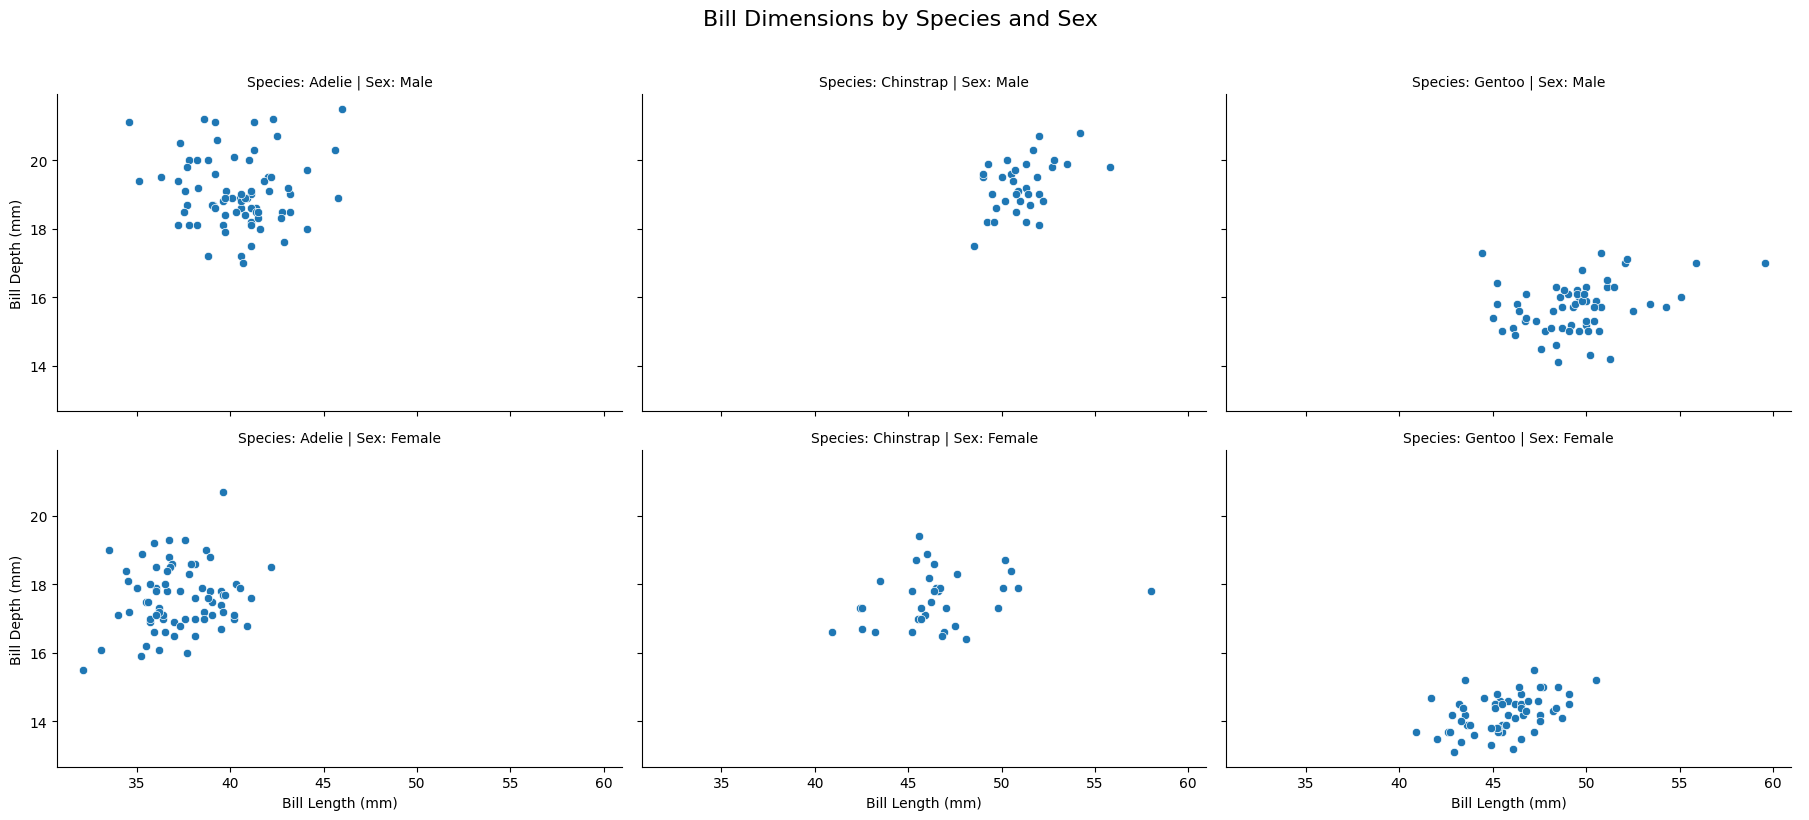

In [24]:
# Create a FacetGrid to show bill dimensions by species and sex
g = sns.FacetGrid(penguins, col='species', row='sex', height=4, aspect=1.5)
g.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm')
g.add_legend()
g.set_titles("Species: {col_name} | Sex: {row_name}")
g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
g.fig.suptitle("Bill Dimensions by Species and Sex", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

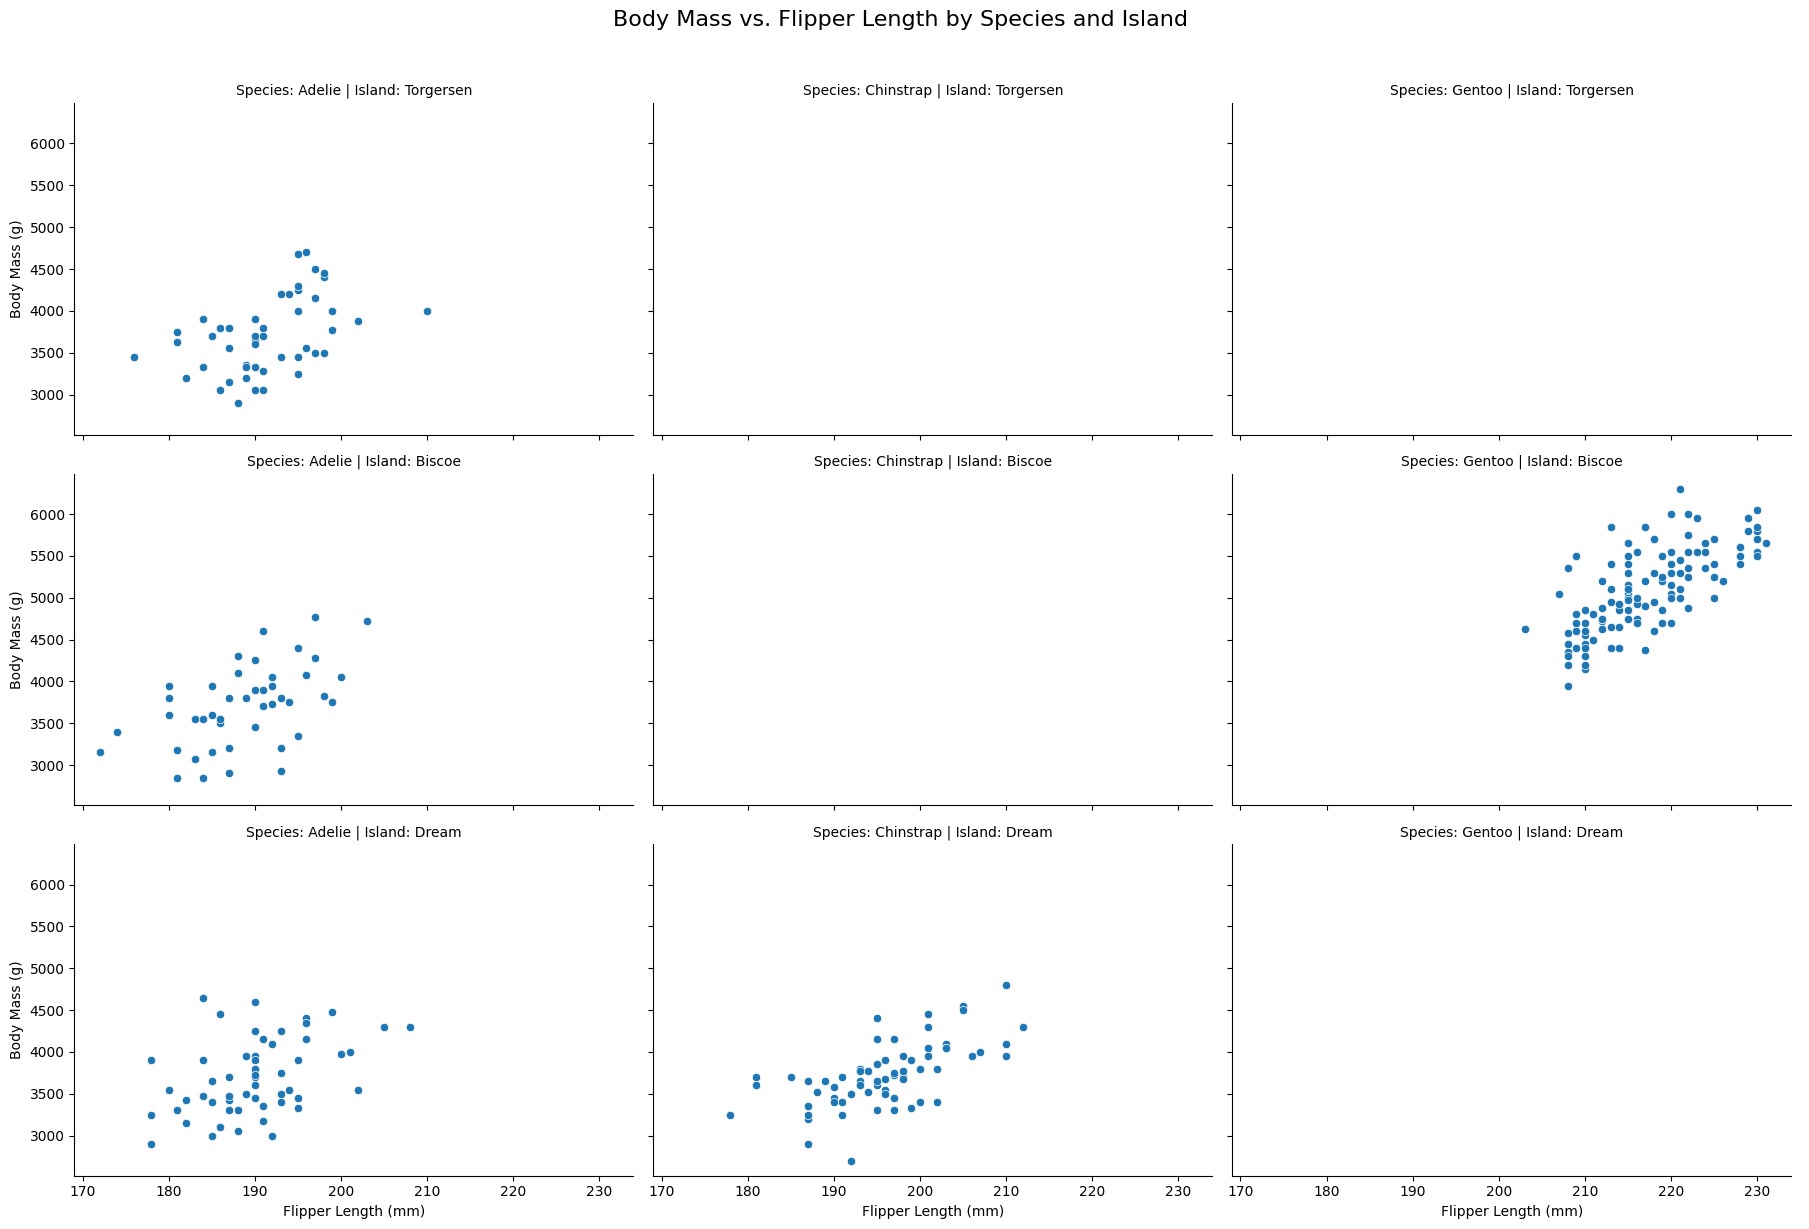

In [25]:
# Create a FacetGrid to show body mass vs. flipper length by species and island
g = sns.FacetGrid(penguins, col='species', row='island', height=4, aspect=1.5)
g.map(sns.scatterplot, 'flipper_length_mm', 'body_mass_g')
g.add_legend()
g.set_titles("Species: {col_name} | Island: {row_name}")
g.set_axis_labels("Flipper Length (mm)", "Body Mass (g)")
g.fig.suptitle("Body Mass vs. Flipper Length by Species and Island", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Clustering Analysis

Let's use a clustermap to visualize how the penguins cluster based on their body measurements.

<Figure size 1200x1000 with 0 Axes>

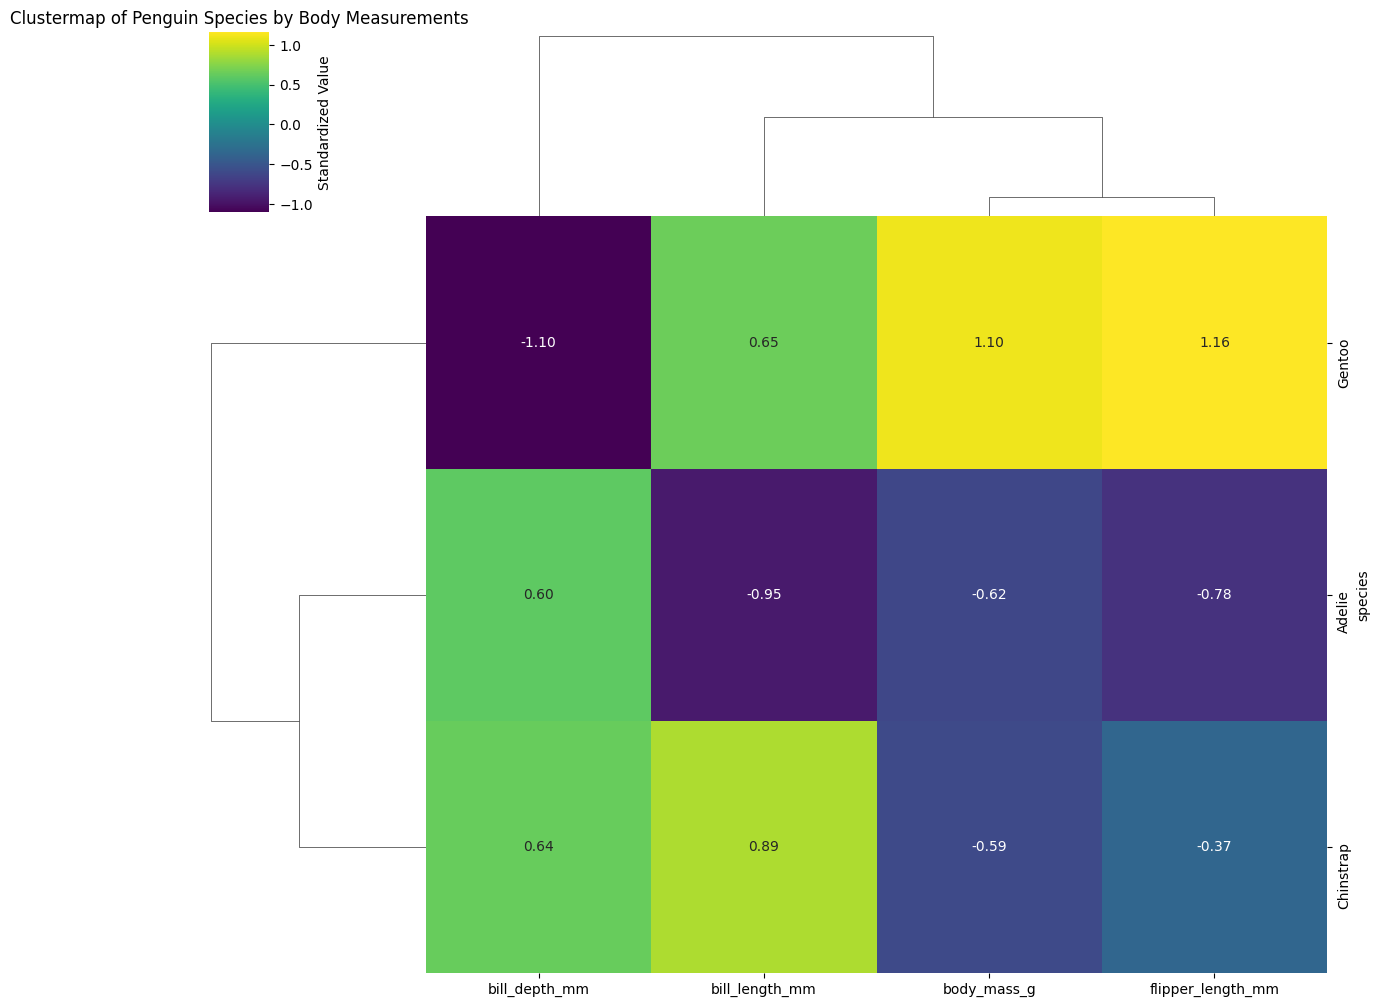

<Figure size 1500x1200 with 0 Axes>

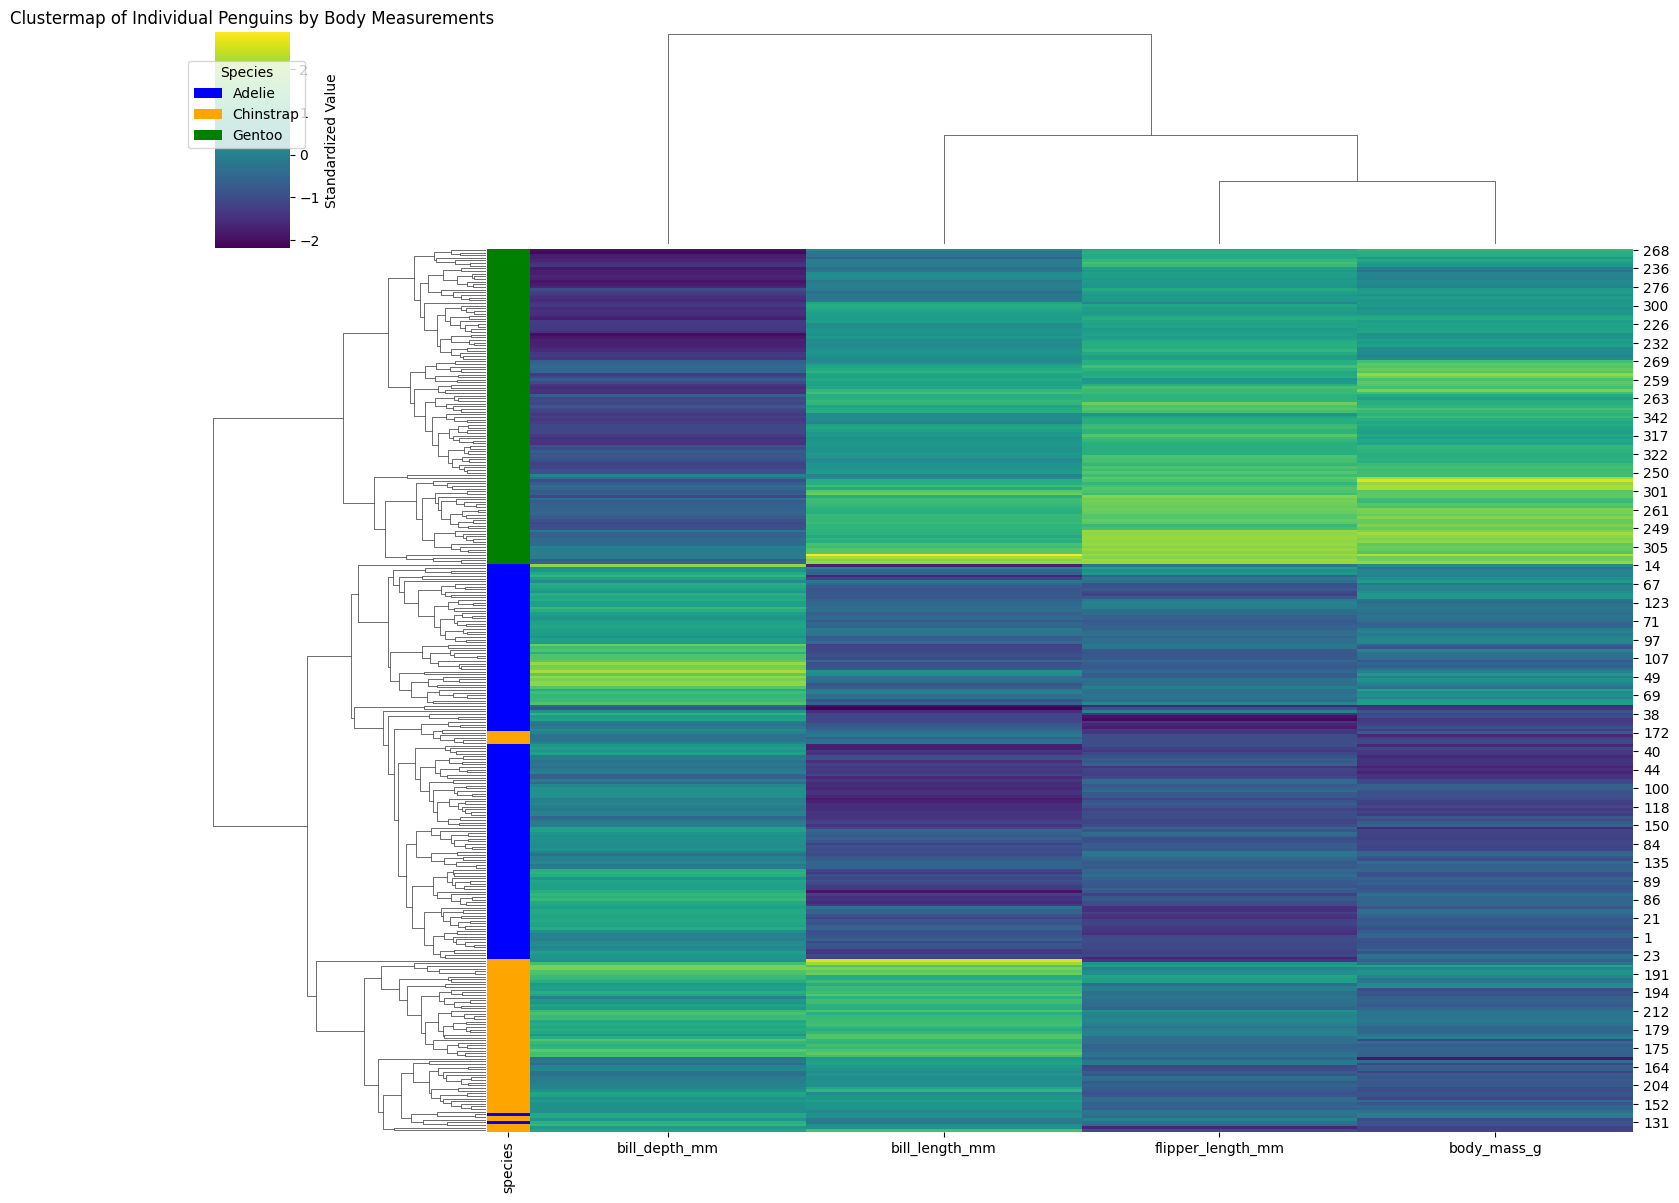

In [26]:
# Prepare data for clustering
# Standardize the numeric columns
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a copy of the data with standardized values
penguins_std = penguins.copy()
penguins_std[numeric_cols] = StandardScaler().fit_transform(penguins[numeric_cols])

# Create a pivot table with species as index and standardized measurements as columns
penguin_pivot = penguins_std.pivot_table(index='species', values=numeric_cols)

# Create a clustermap
plt.figure(figsize=(12, 10))
sns.clustermap(penguin_pivot, cmap='viridis', figsize=(12, 10), annot=True, fmt=".2f", 
              cbar_kws={'label': 'Standardized Value'})
plt.title("Clustermap of Penguin Species by Body Measurements")
plt.show()

# Create a clustermap of individual penguins
# First, create a unique identifier for each penguin
penguins_std['id'] = penguins_std.index

# Create a pivot table with id as index, measurements as columns, and species as values for coloring
penguin_data = penguins_std[numeric_cols].copy()

# Create a mapping of species to numeric values for row colors
species_map = {'Adelie': 'blue', 'Chinstrap': 'orange', 'Gentoo': 'green'}
row_colors = penguins_std['species'].map(species_map)

# Create a clustermap
plt.figure(figsize=(15, 12))
sns.clustermap(penguin_data, cmap='viridis', figsize=(15, 12), row_colors=row_colors, 
              cbar_kws={'label': 'Standardized Value'})
plt.title("Clustermap of Individual Penguins by Body Measurements")

# Add a legend for species
from matplotlib.patches import Patch
handles = [Patch(facecolor=species_map[species]) for species in species_map]
plt.legend(handles, species_map.keys(), title="Species", loc="upper right", bbox_to_anchor=(1.3, 0.9))

plt.show()

## Conclusion

Based on our exploratory data analysis, we can draw several conclusions about the Palmer Penguins dataset:

1. **Species Distribution**: The dataset contains three penguin species: Adelie, Chinstrap, and Gentoo, with Adelie being the most common.

2. **Island Distribution**: The penguins were observed on three islands: Biscoe, Dream, and Torgersen. Each species tends to be found on specific islands, with Gentoo penguins exclusively on Biscoe Island.

3. **Sex Distribution**: The dataset has a relatively balanced distribution of male and female penguins across all species.

4. **Body Measurements**: There are clear differences in body measurements between the three penguin species:
   - Gentoo penguins have the longest bills, longest flippers, and highest body mass.
   - Chinstrap penguins have the shallowest bills.
   - Adelie penguins have the deepest bills relative to their length.

5. **Sexual Dimorphism**: Male penguins generally have larger body measurements than females across all species, particularly in terms of bill dimensions and body mass.

6. **Species Differentiation**: The combination of bill length and bill depth is a good way to distinguish between the three penguin species, with clear clustering visible in scatter plots.

7. **Correlations**: There are strong positive correlations between flipper length and body mass, suggesting that larger penguins have both longer flippers and higher body mass.

8. **Clustering**: Hierarchical clustering based on body measurements successfully separates the three penguin species, confirming that they have distinct morphological characteristics.

This dataset provides a rich example for exploring data visualization and analysis techniques, particularly for understanding how different variables can be used to distinguish between groups in biological data.